<a href="https://colab.research.google.com/github/Am1rTl/Info/blob/main/%D0%94%D0%97_%D0%9A%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) Введение

## Характеристики набора данных

В наборе данных представлна информация об устрицах.

Характеристика | Описание
--- | ---
Sex | Пол
Length | Длина
Diameter | Диаметр
Height | Высота
Whole weight | Полный вес
Shucked weight| Вес мяса
Viscera weight | Вес очишенного мяса
Shell weight | Вес высушенного мяса
Rings | Годовые кольца


### 2) Задание

Построить классифиатор, позволяющий отнести малюска  к одной из возростных категорий. Целевые данные находятся в столбце Rings.

# 3) Загрузка набора данных
1. Загрузить набор данных Abalone_data.xlsx в сесионное хранилище.
1. Создать DataFrame Pandas. Имена столбцов взять из первой строки файла.




In [64]:
#Импорт нужных библиотек
import pandas as pd

In [65]:
#Ваш код для загрузки набора данных и создания объекта DataFrame
data = pd.read_excel("Abalone_data.xlsx")

In [66]:
#Вывести 5-ть первых строк набора данных
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# 4) Изучение набора данных

## 4.1) Определение типов столбцов

In [67]:
#Вывести данные, которые позволяют определить типы столбцов в наборе данных
data.dtypes

,0
Sex,object
Length,float64
Diameter,float64
Height,float64
Whole weight,float64
Shucked weight,float64
Viscera weight,float64
Shell weight,float64
Rings,int64


## 4.1 Проверка наличия отсутствующих значений

In [68]:
#Рассчитать и вывести данные, позволяющие выявить наличие пропушенных данных
data.isnull().sum()


,0
Sex,0
Length,0
Diameter,0
Height,0
Whole weight,0
Shucked weight,0
Viscera weight,0
Shell weight,0
Rings,0


## Заполнение отсутствующих значений или удаление строк с отсутсвующими значениями

Пункт выполняется если в наборе данныъ есть отсутствующие значения

In [69]:
#Ваш код для заполнения пропущенных значений, при необходимости.

#Выводы по разделу 4

Данные не содержат пропусков, большинство параметров типа float64, пол типа object, а таргет имеет тип инт. Получается, что большинство параметров, в том числе и таргет являются числовыми.

## 5) Изучение статистических показателей набора данных

In [70]:
#Рассчитать и вывести статистические данные для исследуемого набора данных.
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


#Выводы по разделу 5

Данные выглядят чистыми, средний возраст малюска составляет 9,9 лет

## 6) Исследовательский анализ данных

## Анализ корреляционной матрицы

В столбце Rings заменить:
* значения не превышающие 8 (<=8) на значение 1;
* значения превышающие 8 на число 2

Вычислить корреляционную матрицу для модифицированного набора данных.

In [71]:
#Ваш код для выполнения указанной замены.
data_new = data.copy()
data_new.loc[data_new['Rings'] <= 8, "Rings"] = 1
data_new.loc[data_new['Rings'] > 8, "Rings"] = 2
data_new.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,1.663155
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,0.472688
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,1.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,2.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,2.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,2.000000


In [76]:
data_new.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,2
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,1
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,2
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,2
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,1


In [78]:
#Ваш код для вычисления корреляционной матрицы
corr_matrix = data_new.corr(numeric_only=True)
data_new.corr(numeric_only=True)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.611338
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.622040
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.561012
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.576125
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.517558
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.567270
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.601332
Rings,0.611338,0.622040,0.561012,0.576125,0.517558,0.567270,0.601332,1.000000


<Axes: >

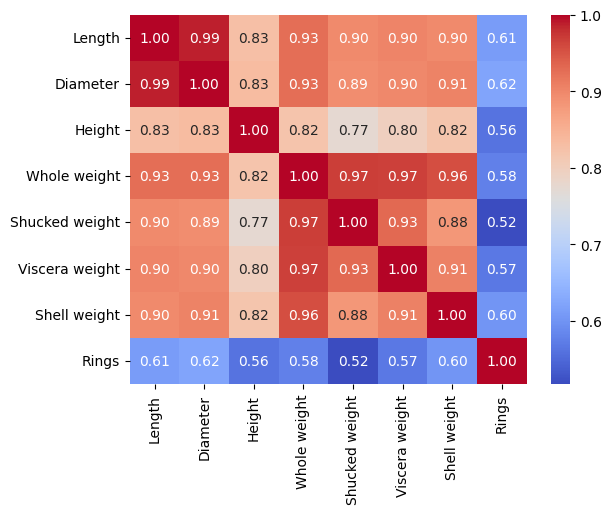

In [83]:
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")


#Выводы по разделу 6

Есть сильно каррелирующие друг от друга параметры, например Viscera weight и Whole weight. Один из таких параметров в последствии, возможно, лучше удалить, чтобы не допустить переобучения. С целевым параметром сильнее всего коррелирует Diameter (0,62), хоть и все признаки не поакзывают высокую корреляцию. Пол показывает наименьшую корреляцию с таргетом(

## 7) Визуализация данных

Выбрать 4 **существенные** признаки.

Под **существенным** будем понимать признак (коэффициент корреляции которого с целевым признаком превышает по абсолютной величине 0.57). Если таких признаков нет, считать существенными все признаки.

Построить гистограмму для каждого из существенных признаков с группировкой по целевому признаку.

In [87]:
#Импортировать библиотеку seaborn
import seaborn as sns
import matplotlib.pyplot as plt

In [84]:
# delete sex
data_new = data_new.drop(columns=['Sex', 'Shucked weight', 'Height', 'Viscera weight'])

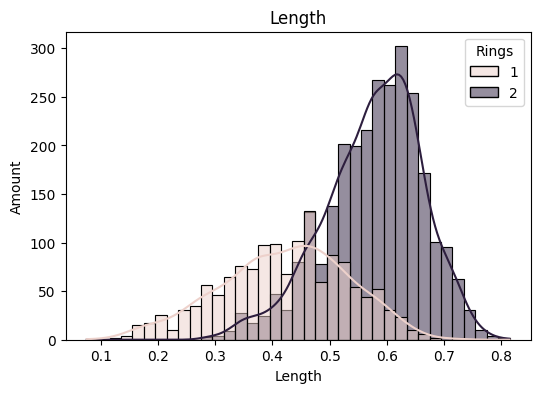

In [92]:
#Ваш код для построения первой гистограммы
plt.figure(figsize=(6, 4))
sns.histplot(data=data_new, x="Length", hue="Rings", kde=True)
plt.title("Length")
plt.xlabel("Length")
plt.ylabel("Amount")
plt.show()

Предполагаю, что гистограмма по уже классифицированнам данным не так информативна, как по первоначальным, поэтому в последствии будет использоваться неклассифицированный возраст

In [ ]:
#Ваш код для построения первой гистограммы

In [ ]:
#Ваш код для построения второй гистограммы

In [ ]:
#Ваш код для построения третьей гистограммы')

In [ ]:
#Ваш код для построения четёртой гистограммы

Удалить из набора данных все несущественные признаки.

In [ ]:
#Ваш код для удаления несущественных признаков

In [ ]:
#Выведите первые 5 строк модифицированного набора данных

Построить парный график для набора существенных признаков (был получен в предыдущем пункте)

In [ ]:
#Ваш код для построения парного графика

Построить тепловую диаграмму для набора существенных признаков.

In [ ]:
#Ваш код для построения тепловой диаграммы

#Выводы по разделу 7
Т.к. длинна и димаетр являлись высококорреляцилнными признками, то и диаграммы по ним получились схожими. Явной зависимости (напрмер, линейной по диаграмм распознать неудаётся). Исходя из парного графика можно сказать, что более старшие особи занимают верхнюю часть графиков зависимости. Также, различи между молодыми и взрослыми особеми по параметрам длинны и диаметра является более существенным, чем по полному весу и весу высушенного мяса. Также, между диаметром и длиной прослеживается явная линейная зависимость, исходя из парного графиака, также, похожая зависимость наблюдается и между полным весом и весом высушенного мяса. Это не удивительно, у данных двух пар корреляция внутри себя составиляет более 90%

# 8) Подготова данных для обучения

Сформировать обучающий набор данных, состоящий из существенных признаков. Целевой признак в набор обучающих данных не включается.

Сформировать наборы данных, состоящий из целевого признака.

In [ ]:
#Ваш код для формирования указанных наборов данных

In [ ]:
#Заменить тип целевого признака на 'category'

In [ ]:
#Вывести первые 5 строк набора данных, содержащего целевой признак

## 8.1 Выполнить нормализацию данных для набора существенных признаков.

In [ ]:
#Импортировать библиотеку preprocessing

In [ ]:
#Выполнить нормализацию набора данных существенных признаков

## 8.2) Разделение набора данных

Разделить нормализованный набор данных и набор данных, содержащий целевй признак, на обучающую и тестовую выборки

In [ ]:
#Импортировать библиотеку train_test_split

In [ ]:
#Разделить нормализованный набор данных на обучающую и тестовую выборки.

# 9) Обучение модели

Обучить модель "Дерево решений".

In [ ]:
#Импортировать библиотеку DecisionTreeClassifier

In [ ]:
#Создать объект классификатора

In [ ]:
#Обучить классификатор

In [ ]:
#Импортировать библиотеку tree

In [ ]:
#Импортировать библиотеку matplotlib.pyplot под именем plt

In [ ]:
#Выполнить следующую команду для подготовки поля рисунка.
plt.figure(figsize=(90,90), facecolor ='k')

In [ ]:
#Отобразить дерево решений с помощью функции tree.plot_tree

## 10) Оценка качества модели

Вычислить прогнозные значения для тестового набора данных.

In [ ]:
#Ваш код для вычисления прогнозных значений

In [ ]:
#Импортировать библиотеки confusion_matrix, precision_score, recall_score, f1_score

In [ ]:
#Ваш код для вычисления матрицы несоответствий

In [ ]:
#Ваш код для вычисления precision score

In [ ]:
#Ваш код для вычисления recall score

In [ ]:
#Ваш код для вычисления f1 score

#Выводы по разделу 10